Connected to salarymodel (Python 3.12.8)

 # Salary Prediction Model

 Table of Contents
 1. [Dataset](#dataset)
 2. [Exploratory Data Analysis](#exploratory-data-analysis)
    1. [Data cleaning](#data-cleaning)
    2. [Data visualization](#data-visualization)
 3. [Model Building](#model-building)
    1. [Data Preprocessing](#data-preprocessing)
    2. [Model Training](#model-training)
 4. [Model Evaluation](#model-evaluation)
 5. [Model Interpretation](#model-interpretation)

 ## Dataset
 This Kaggle dataset contains information about data science salaries across different countries.

In [ ]:
# Download latest version
# import kagglehub
# import os
# import pandas as pd

# path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")
# file_name = "ds_salaries.csv"

# df = pd.read_csv(os.path.join(path, file_name))

# Load from local
import pandas as pd
import os
from pathlib import Path

# Get the directory of the current script
script_dir = Path(__file__).parent

# Construct the path to the data file
data_path = script_dir / "data" / "ds_salaries.csv"

df = pd.read_csv(data_path)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df.shape

(3755, 11)

 ## Exploratory Data Analysis
 ### Data Cleaning
 Most of the columns are categorical. The variable we are interested in / target variable is salary_in_usd.

In [ ]:
# check data types
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
#check missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

 There are some duplicates in the dataset. We will remove them and drop the salary column in local currency.
 We will also rename the experience level column to make it more readable.

In [ ]:
# check duplicates
# print(df[df.duplicated()].shape)
print(f'shape originally: {df[df.duplicated()].shape}')

# remove duplicates
df = df.drop_duplicates()
print(f'shape after removing duplicates: {df.shape}')

# remove salary in local currency
df = df.drop(columns=['salary'])

# rename columns
df['experience_level'] = df['experience_level'].replace({
    'EN': 'Entry',
    'MI': 'Intermediate',
    'SE': 'Senior',
    'EX': 'Executive'
})

shape originally: (1171, 11)
shape after removing duplicates: (2584, 11)


 ### Data Visualization

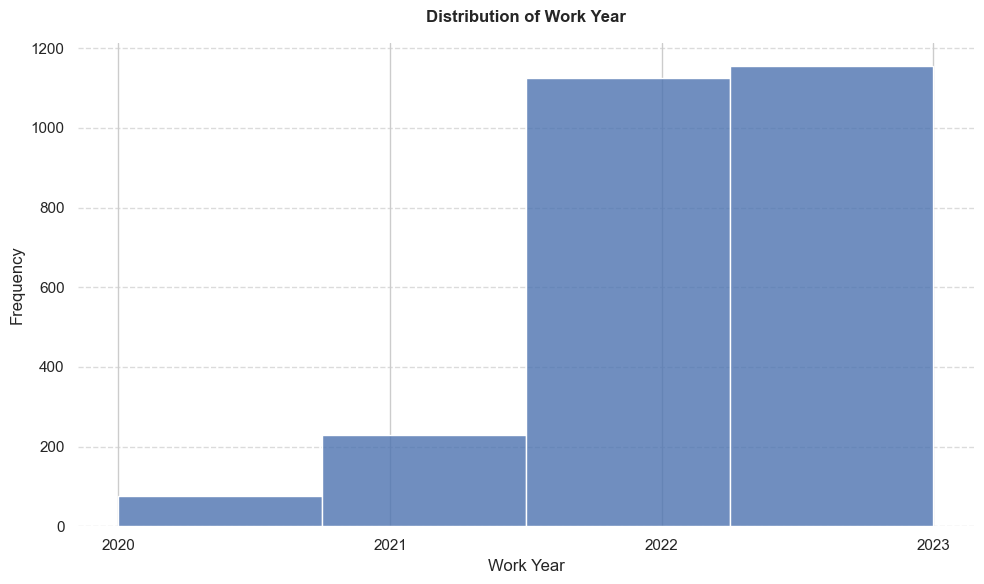

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Plot distribution of work_year
plt.figure(figsize=(10, 6))
sns.histplot(df['work_year'], bins=len(df['work_year'].unique()), alpha=0.8)

plt.title('Distribution of Work Year', fontweight='bold', pad=15)
plt.xlabel('Work Year')
plt.ylabel('Frequency')
plt.xticks(sorted(df['work_year'].unique()))  
plt.grid(axis='y', linestyle='dashed', alpha=0.7) 
plt.box(False)  

plt.tight_layout()
plt.show()

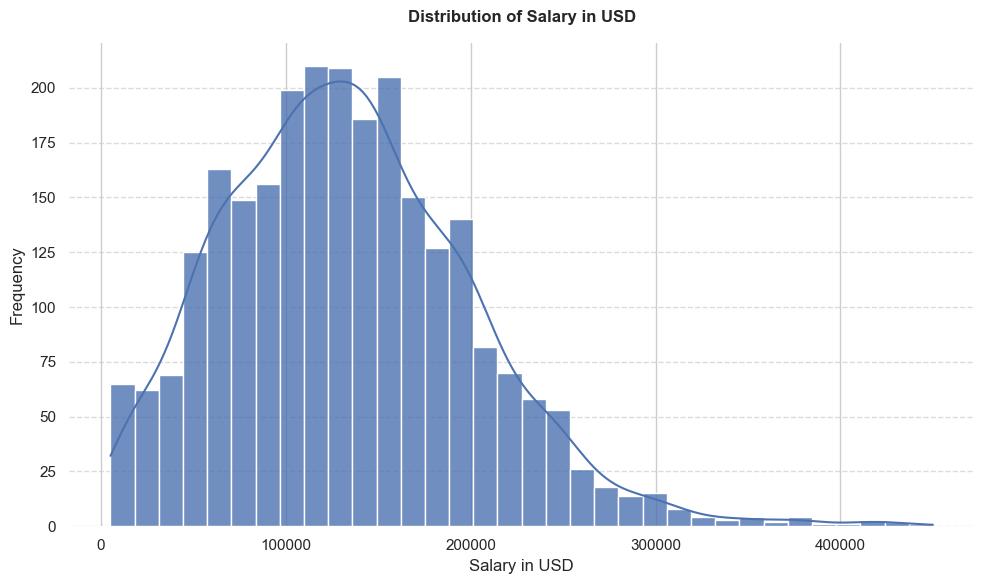

In [ ]:
# Plot distribution of salary_in_usd
plt.figure(figsize=(10, 6))

sns.histplot(df['salary_in_usd'], kde=True, alpha=0.8)

plt.title('Distribution of Salary in USD', fontweight='bold', pad=15)
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='dashed', alpha=0.7)  
plt.box(False) 

plt.tight_layout()
plt.show()

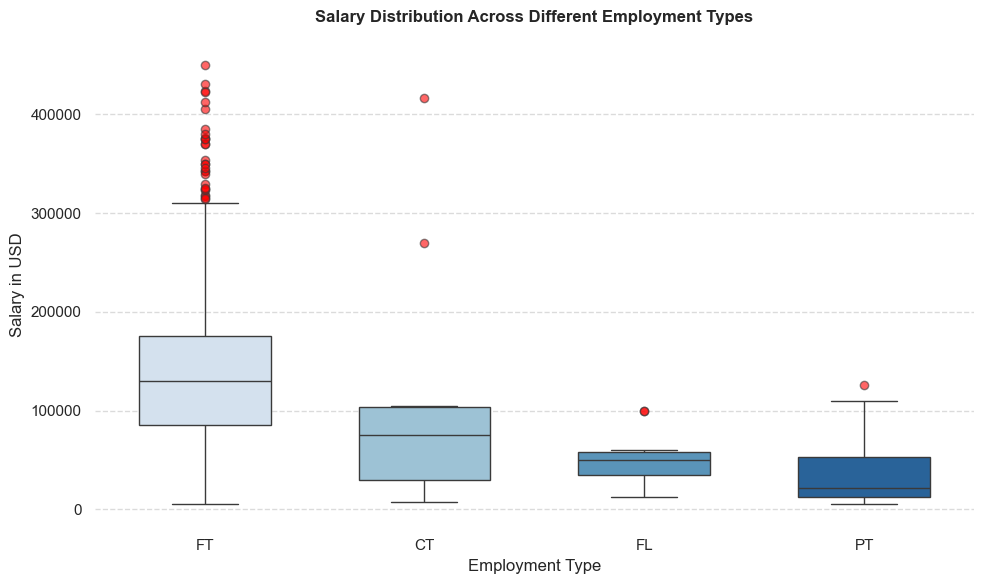

In [ ]:
# Salary distribution across different employment types
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df, x='employment_type', y='salary_in_usd',
    hue='employment_type', palette="Blues", width=0.6, 
    flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red', 'alpha': 0.6},
    legend=False  
)

plt.title('Salary Distribution Across Different Employment Types', fontweight='bold', pad=15)
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.grid(axis='y', linestyle='dashed', alpha=0.7)  
plt.box(False)  

plt.tight_layout()
plt.show()

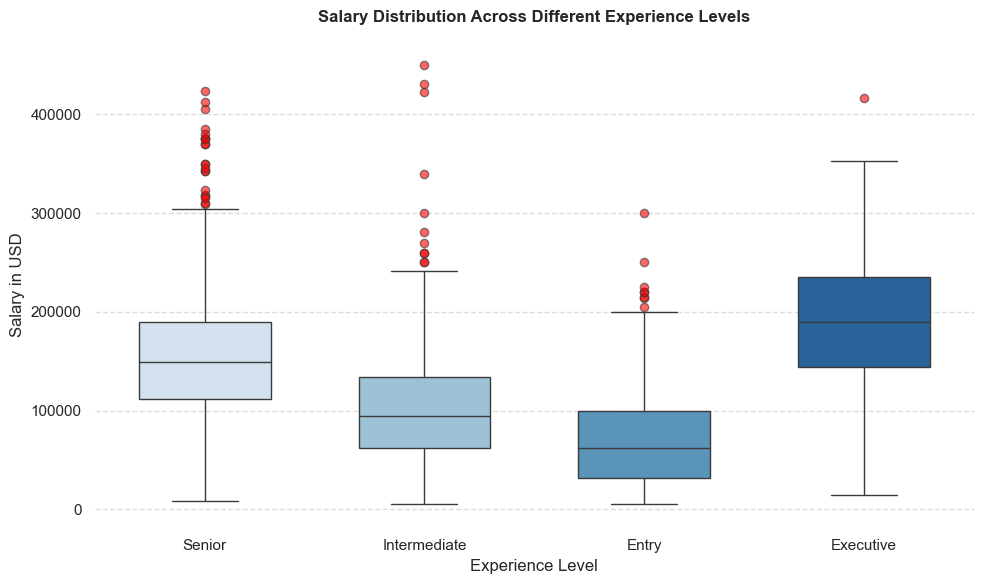

In [ ]:
# Salary distribution across different experience level 
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df, x='experience_level', y='salary_in_usd',
    hue='experience_level', palette="Blues", width=0.6, 
    flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red', 'alpha': 0.6},
    legend=False  
)

plt.title('Salary Distribution Across Different Experience Levels', fontweight='bold', pad=15)
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.grid(axis='y', linestyle='dashed', alpha=0.7)  
plt.box(False)  

plt.tight_layout()
plt.show()

In [ ]:
import pycountry
import plotly.express as px

# Convert ISO 3166 country codes to country names
def country_code_to_name(code):
    if isinstance(code, str) and len(code) == 2:  # Ensure valid two-letter code
        country = pycountry.countries.get(alpha_2=code.upper())  
        return country.name if country else None
    return None  

# Apply conversion
df[['company_location', 'employee_residence']] = df[['company_location', 'employee_residence']].applymap(country_code_to_name)

# Compute average salary by company location
avg_salary_by_location = df.groupby('company_location', as_index=False)['salary_in_usd'].mean()

import plotly.express as px

fig1 = px.choropleth(
    avg_salary_by_location,
    locations="company_location",
    locationmode="country names",
    color="salary_in_usd",
    hover_name="company_location",
    hover_data={"salary_in_usd": ":,.0f"},  # Format salary with commas
    color_continuous_scale=px.colors.sequential.Viridis,  
    title="💼 Average Salary by Company Location",
    labels={"salary_in_usd": "Average Salary (USD)"},
    projection="mercator"  
)

# Modern layout tweaks (Larger size, No Antarctica)
fig1.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor="black",
        showlakes=False,
        showocean=False,
        lataxis=dict(range=[-60, 90])
    ),
    coloraxis_colorbar=dict(
        title="Salary (USD)",
        len=0.5,
        thickness=10
    ),
    template="plotly_white",
    title_x=0.5,
    height=300,
    width=500,
    margin=dict(l=10, r=10, t=50, b=10)
)

fig1.show()


# Calculate average salary by employee residence
avg_salary_by_residence = df.groupby("employee_residence", as_index=False)["salary_in_usd"].mean()

fig2 = px.choropleth(
    avg_salary_by_residence,
    locations="employee_residence",
    locationmode="country names",
    color="salary_in_usd",
    hover_name="employee_residence",
    hover_data={"salary_in_usd": ":,.0f"},  # Format salary with thousands separator
    color_continuous_scale=px.colors.sequential.Viridis,  
    title="🏡 Average Salary by Employee Residence",
    labels={"salary_in_usd": "Average Adjusted Salary"},
    projection="mercator"  
)

fig2.update_layout(
    geo=dict(
        showframe=False,  
        showcoastlines=True,  
        coastlinecolor="black",  
        showlakes=False,  
        showocean=False,  
        lataxis=dict(range=[-60, 90])  
    ),
    coloraxis_colorbar=dict(
        title="Salary (USD)",  
        len=0.5,  
        thickness=10  
    ),
    template="plotly_white",  
    title_x=0.5,  
    height=300,  
    width=500,  
    margin=dict(l=10, r=10, t=50, b=10)  
)

fig2.show()

<ipython-input-10-168a7b1ef587>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['company_location', 'employee_residence']] = df[['company_location', 'employee_residence']].applymap(country_code_to_name)


 ## Model Building
 The model will be built using LightGBM, a gradient boosting framework that uses tree-based learning algorithms.It will be trained to predict the salary in USD.

 ### Data Preprocessing
 We will preprocess the data by:
 - Separating the features and target variable
 - Splitting the data into training, testing, and validation sets
 - Handling missing values
 - Encoding categorical variables
 - Scaling numerical features
 - Saving the preprocessing pipeline

In [ ]:
import joblib
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np

# Define paths
data_path = script_dir / "data" / "prediction_data.csv"
prep_path = script_dir / "models" / "prep_pipeline.joblib"
model_path = script_dir / "models" / "model.joblib"

# Separate features and target 
target = 'salary_in_usd'
X = df.drop(columns=[target])
y = df[target]

y= y.values.reshape(-1,1)
y = np.log(y)

# Split data 
X_train, X_temp, y_train, y_temp = train_test_split(X, y.ravel(), test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Export validation data 
X_val.to_csv(data_path, index=False)

print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}, Validation shape: {X_val.shape}')

Train shape: (1808, 9), Test shape: (388, 9), Validation shape: (388, 9)


In [ ]:
# Preprocessing pipeline
num_feat = X.select_dtypes(include=['number']).columns.tolist() 
cat_feat = X.select_dtypes(exclude=['number']).columns.tolist()

num_transformer = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("scale", RobustScaler()),
])

cat_transformer = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)),
])

prep_pipeline = ColumnTransformer([
    ("num", num_transformer, num_feat),
    ("cat", cat_transformer, cat_feat),
])

# Fit and transform the data
X_train = prep_pipeline.fit_transform(X_train)
X_test = prep_pipeline.transform(X_test)


# Save the pipeline
prep_path.parent.mkdir(parents=True, exist_ok=True) # Create the directory if it doesn't exist
joblib.dump(prep_pipeline, prep_path)

/Users/rantao/anaconda3/envs/salarymodel/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2, 4, 5] during transform. These unknown categories will be encoded as all zeros



['/Users/rantao/Documents/Python_projects/202502_Salary_model_deploy/models/prep_pipeline.joblib']

 ### Model Training
 We will train the model using LightGBM and perform a simple hyperparameter tuning using GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error, PredictionErrorDisplay, r2_score, mean_absolute_error
import seaborn as sns
import numpy as np
import lightgbm as lgbm
import joblib
import warnings

# Hyper paremeter tuning

# ignore FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite'
os.environ["PYTHONWARNINGS"] = "ignore"
warnings.filterwarnings("ignore")

param_grid = {
    'learning_rate': [0.01, 0.015, 0.03, 0.05],
    'max_depth': [3, 5, 10]
}

model = lgbm.LGBMRegressor(random_state=42, verbose=-1)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

In [ ]:
# Save the best model
joblib.dump(best_model, model_path)

best_model

LGBMRegressor(learning_rate=0.05, max_depth=5, random_state=42, verbose=-1)

 ## Model Evaluation
 The model is evaluated using the mean absolute percentage error (MAPE), R-squared, and mean absolute error (MAE).

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAPE: {mape}")
print(f"R-squared: {r2}")
print(f"MAE: {mae}")

MAPE: 0.02608072674469402
R-squared: 0.627675597037487
MAE: 0.29842468679739226


 The model performs reasonably well. The error graphs reveal the presence of outliers, which is expected given the high variance in salary data.

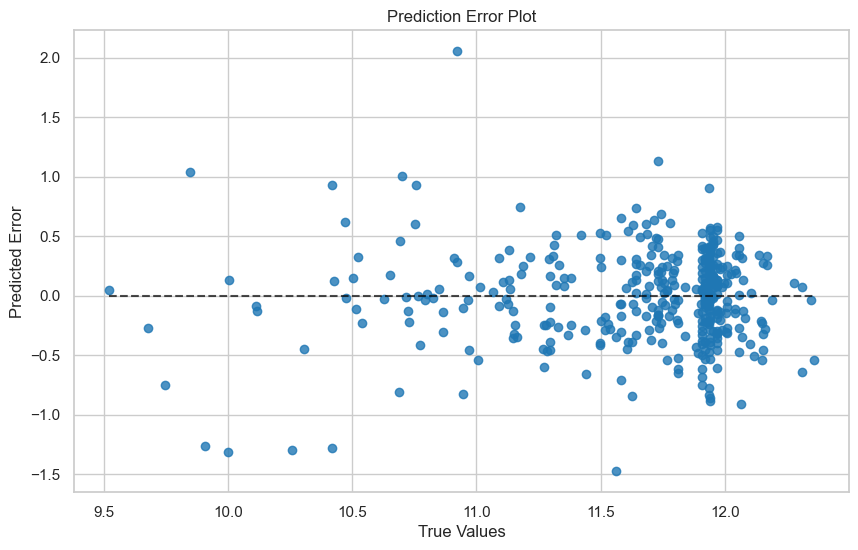

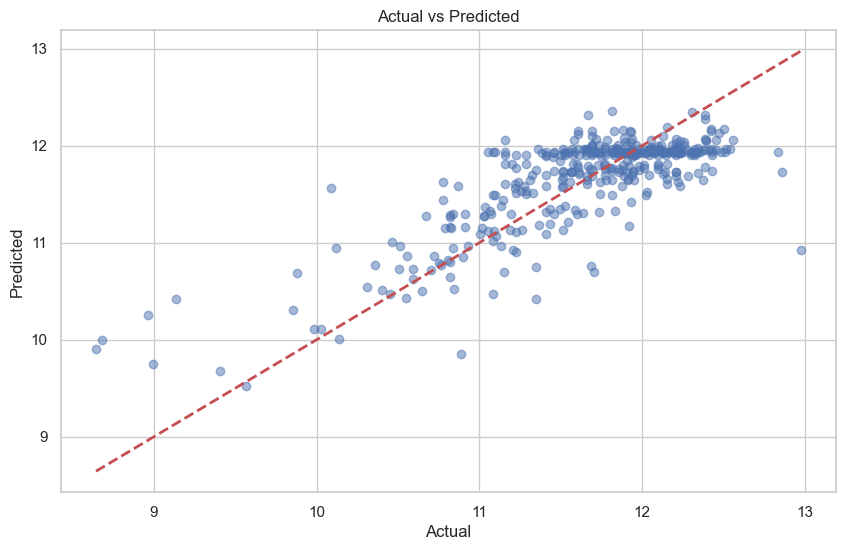

In [ ]:
# Plot prediction error
fig, ax = plt.subplots(figsize=(10, 6))
display = PredictionErrorDisplay(y_true=y_test.ravel(), y_pred=y_pred)
display.plot(ax=ax)
ax.set_title('Prediction Error Plot')
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Error')
plt.show()

# Scatter plot for y_test vs y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

 ## Model interpretation
 Key takeaways:
 - **Geography & Experience** are the ultimate salary game-changers:
     - **USD salaries** and **U.S.-based jobs** boost earnings, while **senior roles** are the real salary superheroes.
     - **INR salaries** drag predictions down—blame regional pay gaps.
 - **Data Analysts**, sadly, earn less compared to other roles.
 - **Smaller companies**? They tend to pinch pennies on paychecks.

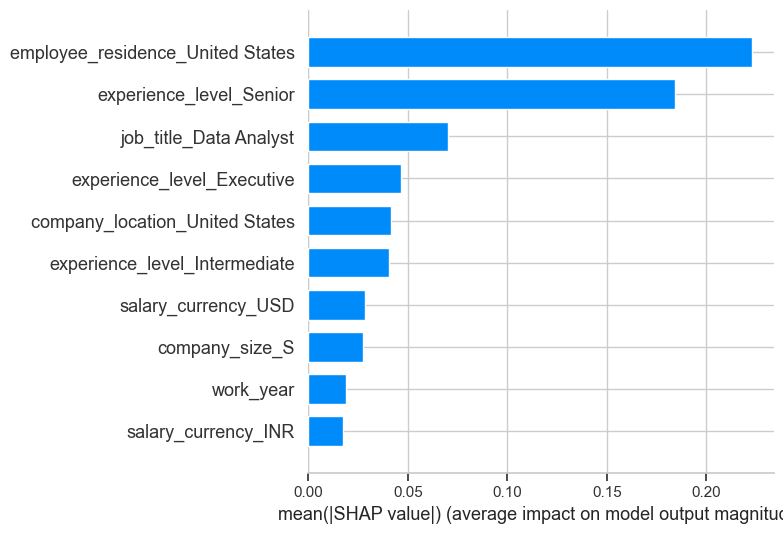

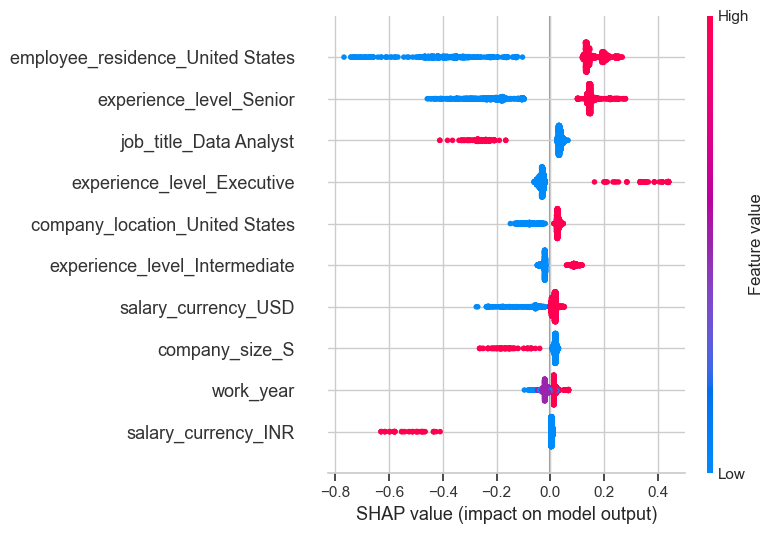

In [ ]:
import shap

# Retrieve feature names from the ColumnTransformer
def get_feature_names(column_transformer):
    feature_names = []
    for name, transformer, features in column_transformer.transformers_:
        if name != 'remainder':
            if hasattr(transformer, 'named_steps'):
                if 'encode' in transformer.named_steps:
                    # OneHotEncoder case
                    encoder = transformer.named_steps['encode']
                    encoded_feature_names = encoder.get_feature_names_out(features)
                    feature_names.extend(encoded_feature_names)
                else:
                    feature_names.extend(features)
            else:
                feature_names.extend(features)
    return feature_names

feature_names = get_feature_names(prep_pipeline)

# Convert the transformed X_train back to a DataFrame
X_train_df = pd.DataFrame(X_train, columns=feature_names)

explainer = shap.Explainer(best_model, X_train_df)

shap_values = explainer(X_train_df)

# Calculate mean absolute SHAP values
mean_shap_values = np.abs(shap_values.values).mean(axis=0)

# Get the top 10 feature indices
top_10_features = np.argsort(mean_shap_values)[-10:]
X_train_top10 = X_train_df.iloc[:, top_10_features]

# Summary plot of SHAP values (bar plot)
shap.summary_plot(shap_values.values[:, top_10_features], X_train_top10, plot_type="bar")

# Detailed summary plot
shap.summary_plot(shap_values.values[:, top_10_features], X_train_top10)